In [1]:
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.shape

(50000, 2)

In [5]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [6]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

#### Result before cleaning

In [7]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

# Text CLeaning

### we need to remove special characters
### We need to filter out the stop words
### we need to split the text into tokens

In [8]:
#using re.compile pattenstring is converted to patten objects
no_space = re.compile("[.;:!\'?,\"()\[\]]")
space = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

##array of stopwords
stop_words = (stopwords.words('english'))


#to tokenize using regular expression method
tokenizer=RegexpTokenizer(r'\w+')

stemmer = SnowballStemmer(language='english')

#words are reduced to its root form using stemming method


def data_cleaning(review):
    clean_review = review.lower() #converted each letter to lower case
    clean_review = no_space.sub("",review) # all special character beloning to no_space objects replaced by ""
    clean_review = space.sub("",review) # all special character beloning to space objects replaced by " "
    tokens = tokenizer.tokenize(clean_review)
    clean_tokens =[]
    
    #stemming is done to reduce word to its root form
    for token in tokens:
        if token not in stop_words:
            clean_tokens.append(token)
    
    stem_tokens=[]
    
    for token in clean_tokens:
        stem_tokens.append(stemmer.stem(token))
        
    clean_review=' '.join(stem_tokens)

        
    return clean_review

#### Result after cleaning

In [9]:
data_cleaning(data['review'][1])

'a wonder littl product the film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec the actor extrem well chosen michael sheen got polari voic pat you truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec a master product one great master comedi life the realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear it play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done'

In [10]:
data['review'].apply(data_cleaning)

0        one review mention watch 1 oz episod hook they...
1        a wonder littl product the film techniqu unass...
2        i thought wonder way spend time hot summer wee...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    i thought movi right good job it creativ origi...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    i cathol taught parochi elementari school nun ...
49998    i go disagre previous comment side maltin one ...
49999    no one expect star trek movi high art fan expe...
Name: review, Length: 50000, dtype: object

### Splitting train and test set

In [11]:
train_reviews=data.review[:40000]
train_sentiments=data.sentiment[:40000]

In [12]:
test_reviews=data.review[40000:]
test_sentiments=data.sentiment[40000:]

## Binary vectorization

###### Binary Term Frequency captures presence (1) or absence (0) of term in document

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
cv.fit(train_reviews)


CountVectorizer(binary=True)

In [14]:
train_reviews = cv.transform(train_reviews)
test_reviews = cv.transform(test_reviews)

## Logistic Regression Model

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_reviews,train_sentiments)

RandomForestClassifier()

In [16]:
Y_predict = rf.predict(test_reviews)
Y_proba = rf.predict_proba(test_reviews)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cf_matrix=confusion_matrix(test_sentiments, Y_predict)

### visualizing confusion matrix

<AxesSubplot:>

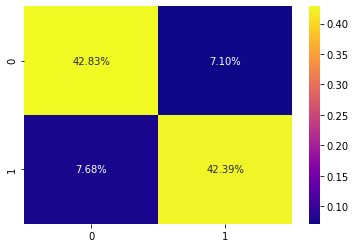

In [19]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='plasma')

#### precision- recall

In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(test_sentiments, Y_predict,average="binary", pos_label="positive")

0.8565366740755708

In [21]:
recall_score(test_sentiments, Y_predict,average="binary", pos_label="positive")

0.8466147393648892

In [22]:
from sklearn.metrics import f1_score
f1_score(test_sentiments, Y_predict,average="binary", pos_label="positive")

0.8515468059461632

In [23]:
from sklearn.metrics import classification_report

In [24]:
cr = classification_report(test_sentiments,Y_predict,target_names=['Positive','Negative'])

In [25]:
print(cr)

              precision    recall  f1-score   support

    Positive       0.85      0.86      0.85      4993
    Negative       0.86      0.85      0.85      5007

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [26]:
train_reviews[0]

<1x92887 sparse matrix of type '<class 'numpy.int64'>'
	with 186 stored elements in Compressed Sparse Row format>

In [27]:
cv.get_feature_names

<bound method CountVectorizer.get_feature_names of CountVectorizer(binary=True)>

In [28]:
feature_to_coef = {
    word : coef for word, coef in zip(cv.get_feature_names(), log_reg.coef_[0])
}

NameError: name 'log_reg' is not defined

In [ ]:
feature_to_coef

In [ ]:
log_reg.coef_[0]

In [ ]:
for best_positive in sorted(
        feature_to_coef.items(),
        key=lambda x: x[1],
        reverse=True)[:5]:
    print(best_positive)

In [29]:
#Randomized search CV

#number of trees in random forest 
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1,2,5,10]


In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [32]:
rf_random = RandomizedSearchCV(estimator= rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv = 5, verbose = 2, random_state=42, n_jobs=1) 

In [33]:
rf_random.fit(train_reviews, train_sentiments)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.3min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.3min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.2min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.2min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.2min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.5min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.6min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.5min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.4min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.5min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  35.5s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  35.3s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  36.9s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  38.6s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  37.4s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  51.6s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  52.2s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  53.9s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  51.6s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  51.7s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 1.8min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 1.8min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.0min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 1.8min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 1.8min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 5.1min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 5.5min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 6.7min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 5.8min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 5.2min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  47.4s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  46.2s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  46.8s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  45.8s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  46.1s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=  40.4s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=  39.7s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=  39.5s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=  40.2s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=  43.2s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=  38.4s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=  30.2s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=  37.8s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=  39.5s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=  31.4s


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.6min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.5min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.8min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.5min


c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\ammu\anaconda3\envs\penv1\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  Fil

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.7min


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [34]:
predictions = rf_random.predict(test_reviews)

In [37]:
predictions_prob = rf_random.predict_proba(test_reviews)

In [39]:
cf_matrix_random=confusion_matrix(test_sentiments, predictions)

<AxesSubplot:>

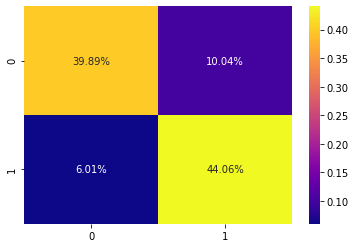

In [40]:
sns.heatmap(cf_matrix_random/np.sum(cf_matrix_random), annot=True, fmt='.2%', cmap='plasma')

In [41]:
cr = classification_report(test_sentiments,predictions,target_names=['Positive','Negative'])

In [43]:
print(cr)

              precision    recall  f1-score   support

    Positive       0.87      0.80      0.83      4993
    Negative       0.81      0.88      0.85      5007

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [44]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [45]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=900)